# Perceptron

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [17]:
# trying to create a dataset
X,Y = make_blobs(n_samples=500,n_features=2,centers=2,random_state=10)
print(X.shape,Y.shape)

(500, 2) (500,)


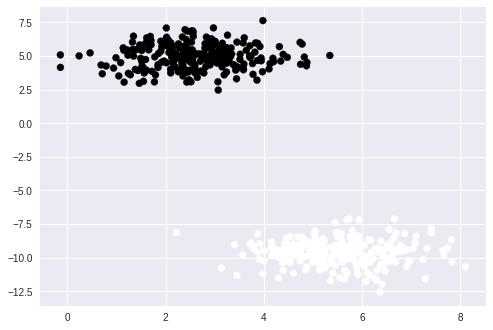

In [18]:
# let's do some visualization
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

### Model and Helper functions

In [35]:
# it is a sigmoid function it's range btw 0 to 1
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))



In [36]:
'''z = np.array([1,2,3,4,5])
sigmoid(z)'''

'z = np.array([1,2,3,4,5])\nsigmoid(z)'

### implement Perceptron Learning Algorithm
 1 learn the weights
 
 2 reduce the loss
 
 3 make the prediction

In [41]:
def predict(X,weights):
    '''X -> mx(n+1) matrix, w-->(nx1) matrix'''
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

# define a loss function
def loss(X,Y,weights):
    '''Binary cross Entropy'''
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))  # it's a binary cross entropy loss
    return cost

def update(X,Y,weights,learning_rate):
    '''perform weight update for 1 epoch'''
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m)) # try to update weights
    return weights

    
def train(X,Y,learning_rate = 0.5,maxepochs = 100 ):
    #modify the input to handel the biase term 
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    #input weight 0
    weights  = np.zeros(X.shape[1]) #n+1 entries
    
    # iterate over all epochs and make updates
    
    for epoch in range(maxepochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            print("epoch %d Loss %.4f"%(epoch,l))
            
    return weights
            
            
    
    
    
    
    
    

In [44]:
weights = train(X,Y,maxepochs = 500)
print(weights)

epoch 0 Loss 0.0006
epoch 10 Loss 0.0005
epoch 20 Loss 0.0005
epoch 30 Loss 0.0005
epoch 40 Loss 0.0005
epoch 50 Loss 0.0004
epoch 60 Loss 0.0004
epoch 70 Loss 0.0004
epoch 80 Loss 0.0004
epoch 90 Loss 0.0004
epoch 100 Loss 0.0004
epoch 110 Loss 0.0003
epoch 120 Loss 0.0003
epoch 130 Loss 0.0003
epoch 140 Loss 0.0003
epoch 150 Loss 0.0003
epoch 160 Loss 0.0003
epoch 170 Loss 0.0003
epoch 180 Loss 0.0003
epoch 190 Loss 0.0003
epoch 200 Loss 0.0003
epoch 210 Loss 0.0003
epoch 220 Loss 0.0002
epoch 230 Loss 0.0002
epoch 240 Loss 0.0002
epoch 250 Loss 0.0002
epoch 260 Loss 0.0002
epoch 270 Loss 0.0002
epoch 280 Loss 0.0002
epoch 290 Loss 0.0002
epoch 300 Loss 0.0002
epoch 310 Loss 0.0002
epoch 320 Loss 0.0002
epoch 330 Loss 0.0002
epoch 340 Loss 0.0002
epoch 350 Loss 0.0002
epoch 360 Loss 0.0002
epoch 370 Loss 0.0002
epoch 380 Loss 0.0002
epoch 390 Loss 0.0002
epoch 400 Loss 0.0002
epoch 410 Loss 0.0002
epoch 420 Loss 0.0002
epoch 430 Loss 0.0002
epoch 440 Loss 0.0002
epoch 450 Loss 0.0002

## Perceptron Implementation - Part -II
1 Make Predictios

2 Visualise Decision Surface

3 Linear vs Non-linear classification 

In [68]:
def getprediction(X_test,weights,labels = True):
    if X_test.shape[1] != weights.shape[0]:#check if there is biase term or not
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
    
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels
        
        

In [69]:
'''a = np.zeros((5,5))
a[2,3] = 10
print(a)
a[a>0] = 20
print(a)'''

'a = np.zeros((5,5))\na[2,3] = 10\nprint(a)\na[a>0] = 20\nprint(a)'

In [70]:
weights

array([ 0.0656045 , -0.19220497,  2.05528664])

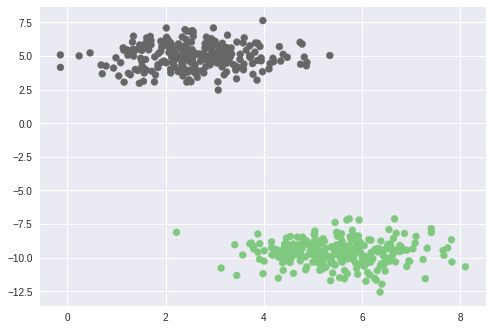

In [71]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

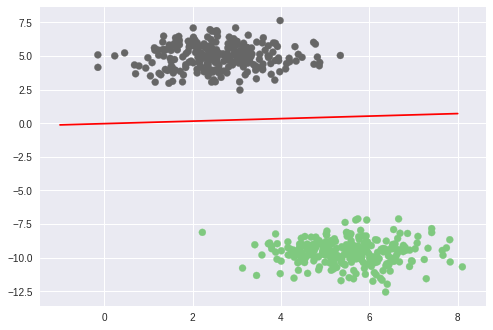

In [72]:
x1 = np.linspace(-1,8,20)
x2 = -(weights[0] + weights[1] *x1)/weights[2]
plt.plot(x1,x2,c = 'red')
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

In [74]:
#Find the accuracy 
Y_ = getprediction(X,weights,labels = True)
training_acc = np.sum(Y_ == Y)/Y.shape[0]
print(training_acc)

1.0
